In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager


In [360]:
ChromeDriverManager().install()

'/Users/martinreyes/.wdm/drivers/chromedriver/mac64/116.0.5845.140/chromedriver-mac-x64/chromedriver'

In [3]:
url = 'https://www.glassdoor.com/Reviews/AT-and-T-Texas-Reviews-EI_IE613.0,8_IL.9,14_IS1347.htm'

# Set up the Selenium driver with options
options = Options()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(service=Service(webdriver_path), options=options)

# Load the webpage
driver.get(url)


In [2]:
# Install Webdriver
service = Service(ChromeDriverManager().install())
# Create Driver Instance
driver = webdriver.Chrome(service=service)

In [361]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

In [127]:
# Create Driver Instance
driver = webdriver.Chrome(service=service)

driver.get("""https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm""")

pros = ''
for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text
print(len(pros))
cons = ''
for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text

driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
next_url = driver.current_url

driver.quit()

# Create Driver Instance
driver = webdriver.Chrome(service=service)
driver.get(next_url)

for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text

for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text
print(len(pros2))
print(len(pros))

9769
3204
12973


In [46]:
pros = ''
cons = ''

for i in range(5):
    print(i)
    if i == 0:
        next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

    driver = webdriver.Chrome(service=service)
    driver.get(next_url)
    for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
        pros += pro.text

    for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
        cons += con.text
    
    driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
    next_url = driver.current_url
    driver.quit()

0
1
2
16136


In [47]:
len(cons)

19200

In [235]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

names = []
ratings = []
pros = []
cons = []

# company page 1-30
for page in range(1, 2):
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    driver = webdriver.Chrome(service=service)
    # access company page
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')

    for link in review_links:
        link.click
        # Get company pros and cons
        pros = ''
        cons = ''

        for i in range(5):
            print(i)
            if i == 0:
                next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

            driver = webdriver.Chrome(service=service)
            driver.get(next_url)
            for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
                pros += pro.text

            for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
                cons += con.text

            driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
            next_url = driver.current_url

            driver.quit()
    
    # Extract names and ratings and add them to the lists
    for name, rating in zip(employer_names, employer_ratings):
        names.append(name.text)
        ratings.append(rating.text)

    # Create a DataFrame
    data = {'employer_name': names,
            'rating': ratings}
    df = pd.DataFrame(data)

df        


KeyboardInterrupt



In [70]:
hrefs = []
for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
    hrefs.append(ele.get_attribute("href"))


In [71]:
hrefs

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm']

In [85]:
driver.quit()

In [342]:
names = []
ratings = []
review_urls = []

for page in range(1, 3):
    print(page)
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    # access company page
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]')
     
    # Extract names and ratings and add them to the lists
    for name, rating, link in zip(employer_names, employer_ratings, review_links):
        names.append(name.text)
        ratings.append(rating.text)
        review_urls.append(link.get_attribute("href"))
    
    driver.quit()
    
# Create a DataFrame
data = {'name': names,
        'rating': ratings,
        'url': review_urls}
    
df = pd.DataFrame(data)

1
2


In [343]:
df

,name,rating,url
0,Amazon,3.7,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,Deloitte,4.0,https://www.glassdoor.com/Reviews/Deloitte-Rev...
2,Walmart,3.3,https://www.glassdoor.com/Reviews/Walmart-Revi...
3,Target,3.6,https://www.glassdoor.com/Reviews/Target-Revie...
4,McDonald's,3.5,https://www.glassdoor.com/Reviews/McDonald-s-R...
5,Infosys,3.3,https://www.glassdoor.com/Reviews/Infosys-Revi...
6,Accenture,4.0,https://www.glassdoor.com/Reviews/Accenture-Re...
7,IBM,3.9,https://www.glassdoor.com/Reviews/IBM-Reviews-...
8,Microsoft,4.3,https://www.glassdoor.com/Reviews/Microsoft-Re...
9,Tata Consultancy Services,3.9,https://www.glassdoor.com/Reviews/Tata-Consult...


In [257]:
data = {'name': names, 'rating': ratings, 'url': review_urls
       }
df = pd.DataFrame(data)

In [259]:
df

,name,rating,url
0,Amazon,3.7,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,Deloitte,4.0,https://www.glassdoor.com/Reviews/Deloitte-Rev...
2,Walmart,3.3,https://www.glassdoor.com/Reviews/Walmart-Revi...
3,Target,3.6,https://www.glassdoor.com/Reviews/Target-Revie...
4,McDonald's,3.5,https://www.glassdoor.com/Reviews/McDonald-s-R...
...,...,...,...
985,Duke Health,3.7,https://www.glassdoor.com/Reviews/Duke-Health-...
986,Walmart Global Tech,3.9,https://www.glassdoor.com/Reviews/Walmart-Glob...
987,Five Below,3.3,https://www.glassdoor.com/Reviews/Five-Below-R...
988,UniFirst,3.7,https://www.glassdoor.com/Reviews/UniFirst-Rev...


In [260]:
df.to_csv('../ratings.csv')

In [252]:
len(df)

20

In [254]:
len(names)

990

In [255]:
len(ratings)

990

In [355]:
for url in review_urls:
    pros = ''
    cons = ''
    for i in range(20):
        print(i)
        if i == 0:
            next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

        driver = webdriver.Chrome(service=service)
        driver.get(next_url)
        for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
            pros += pro.text

        for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
            cons += con.text

        driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
        next_url = driver.current_url
        driver.quit()

0
1


KeyboardInterrupt: 

In [12]:
counter = 700
# Initialize an empty list to store data
data = []

# Loop through the review URLs
for company_url in review_urls[700:]:
    print(counter, company_url)
    counter += 1
    max_retries = 3
    retry_count = 0
    while retry_count < max_retries:
        try:
            pros = ''
            cons = ''

            for i in range(10):
                if i % 4 == 0:
                    print(i)
                if i == 0:
                    next_url = company_url

                driver = webdriver.Chrome(service=service)
                driver.get(next_url)

                for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']"):
                    pros += pro.text + '\n'

                for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']"):
                    cons += con.text + '\n'

                driver.find_element(By.CSS_SELECTOR, 'button[data-test="pagination-next"]').click()
                next_url = driver.current_url

                driver.quit()

            data.append({'company': company_url, 'pros': pros, 'cons': cons})
            break  # Break the while loop if successful
        except Exception as e:
            print(f"An error occurred: {e}")
            retry_count += 1
            print(f"Retrying... Attempt {retry_count}")
            time.sleep(5)  # Wait for a few seconds before retrying

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

700 https://www.glassdoor.com/Reviews/Motorola-Mobility-Reviews-E451.htm
0


KeyboardInterrupt: 

In [331]:
df1 = pd.DataFrame(data)

In [332]:
df1

,company,pros,cons
0,https://www.glassdoor.com/Reviews/Reynolds-and...,Ground-up hiring. All-internal promotions. Rel...,Not a great place to transition to from a high...
1,https://www.glassdoor.com/Reviews/SSM-Health-R...,Work life balance Pay Culture\nConscientious m...,No holidays paid Time off required 6 weeks in ...
2,https://www.glassdoor.com/Reviews/Mercy-Review...,I've been with Mercy for over 3 years and a te...,I wish positions paid better. It seems that ac...
3,https://www.glassdoor.com/Reviews/Ace-Hardware...,Great workers and managers they welcome you li...,Barely get hours cluster junky\nIf you happen ...
4,https://www.glassdoor.com/Reviews/Parker-Hanni...,Opportunities for new college graduates Good e...,Base pay Location Jobs might sometimes be out ...
...,...,...,...
285,https://www.glassdoor.com/Reviews/Duke-Health-...,Worked one on one with 2 preceptors. Gained va...,It is a big hospital system.\nNo cons to worki...
286,https://www.glassdoor.com/Reviews/Walmart-Glob...,"Good health benefits, good bonus, good working...",Other than location all are fine\nFast paced. ...
287,https://www.glassdoor.com/Reviews/Five-Below-R...,"Good place to work at\nAmazing coworkers, fun ...",Not the greatest pay offered\nI worked here as...
288,https://www.glassdoor.com/Reviews/UniFirst-Rev...,Training and support Company culture Bonus pot...,Demanding industry Supply chain challenges\nVe...


In [333]:
len(df1)

290

In [297]:
#df

In [337]:
df1.to_csv('700_989.csv', index=False)

In [336]:
review_urls[989]

'https://www.glassdoor.com/Reviews/Temple-University-Reviews-E23406.htm'

<Axes: xlabel='rating', ylabel='Count'>

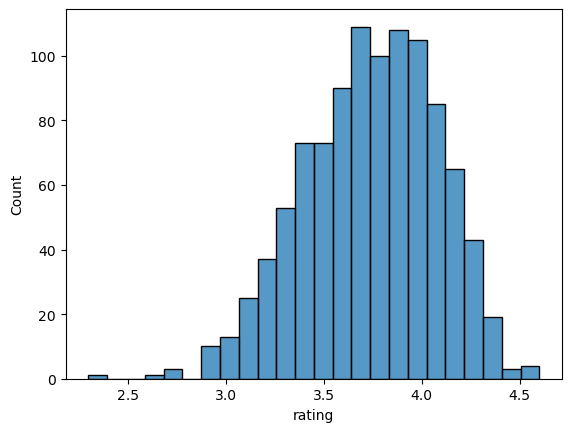

In [101]:
import seaborn as sns
sns.histplot(df['rating'])

In [102]:
# Define the bin edges
bin_edges = [0, 3.3, 3.7, 4.2, 5.0]

# Define the bin labels
bin_labels = [3, 3.5, 4, 4.5]

# Add a new column 'rating_binned' to the DataFrame with the binned values
df['rating_binned'] = pd.cut(df['rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['rating_binned'].value_counts()

In [108]:
driver.quit()

In [357]:
review_urls[0]

'https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm'

In [363]:
review_urls

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm',
 'https://www.glassdoor.com/Reviews/Starbucks-Reviews-E2202.htm',
 'https://www.glassdoor.com/Reviews/Google-Reviews-E9079.htm',
 'https://www.glassdoor.com/Reviews/Cognizant-Technology-Solutions-Reviews-E8014.htm',
 'https://www.glassdoor.com/Reviews/EY-Reviews-E2784.htm',
 'https://www.glassdoor.com/Reviews/The-Home-Depot-Reviews-E655.htm'

In [10]:
driver.quit()

In [42]:
counter = 0
# Initialize an empty list to store data
data = []

# Loop through the review URLs
for url in review_urls:
    if counter % 5 == 0:
        print(counter)
    counter += 1
    max_retries = 3
    retry_count = 0
    while retry_count < max_retries:
        try:
            driver = webdriver.Chrome(service=service)
            driver.get(url)

            ceo_approval = driver.find_elements(By.XPATH, '//*[@id="EmpStats"]/div[2]/div[2]/div[2]/div[1]/div')
            friend_recommendation = driver.find_elements(By.XPATH, '//*[@id="EmpStats_Recommend2"]')
            
            ceo_approval = int(ceo_approval[0].get_attribute('data-percentage'))
            friend_recommendation = int(friend_recommendation[0].get_attribute('data-percentage'))
            
            driver.quit()

            data.append({'url': url,
                         'ceo_approval': ceo_approval,
                         'friend_recommendation': friend_recommendation})
            break  # Break the while loop if successful
        except Exception as e:
            driver.quit()
            print(f"An error occurred: {e}")
            retry_count += 1
            print(f"Retrying... Attempt {retry_count}")
            time.sleep(5)  # Wait for a few seconds before retrying

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

0
5
10
15
20
25
30
35
40
45
50
55
An error occurred: list index out of range
Retrying... Attempt 1
An error occurred: list index out of range
Retrying... Attempt 2
An error occurred: list index out of range
Retrying... Attempt 3
60
An error occurred: list index out of range
Retrying... Attempt 1
An error occurred: list index out of range
Retrying... Attempt 2
An error occurred: list index out of range
Retrying... Attempt 3
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
An error occurred: Message: timeout: Timed out receiving message from renderer: 299.553
  (Session info: chrome=116.0.5845.140)
Stacktrace:
0   chromedriver                        0x000000010eb2f638 chromedriver + 5002808
1   chromedriver                        0x000000010eb26a53 chromedriver + 4966995
2   chromedriver                        0x000000010e6d7a57 chromedriver + 449111
3   chromedriver                        0x000000010e6bc320 chromedriver + 336672
4   chromedriver                        0x00000001

In [44]:
df = pd.DataFrame(data)
df.to_csv('ceo_approval_data.csv', index=False)

In [8]:
import time

In [ ]:
url = review_urls[0]
driver = webdriver.Chrome(service=service)
driver.get(url)

In [27]:
ceo_approval = driver.find_elements(By.XPATH, '//*[@id="EmpStats"]/div[2]/div[2]/div[2]/div[1]/div')
friend_recommendation = driver.find_elements(By.XPATH, '//*[@id="EmpStats_Recommend2"]')

data.append({'url': url,
             'ceo_approval': ceo_approval,
             'friend_recommendation': friend_recommendation})

In [34]:
int(friend_recommendation[0].get_attribute('data-percentage'))

69

In [35]:
int(ceo_approval[0].get_attribute('data-percentage'))

71